1. Скачать список пользователей, состоящих в группе https://vk.com/dormitory8hse. Нарисовать столбчатую диаграмму, показывающую, сколько человек из каких городов состоит в группе.

In [5]:
import urllib.request
import json

In [6]:
offsets = [0, 1000, 2000, 3000, 4000]
users = set()
for off in offsets:
    req = urllib.request.Request('https://api.vk.com/method/groups.getMembers?group_id=dormitory8hse&offset=' + str(off))
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    users = users | set(data['response']['users'])
len(users)

4390

In [ ]:
cities = []
i = 0
for user in users:
    print(i)
    if i > 1000:
        break
    req = urllib.request.Request('https://api.vk.com/method/users.get?user_ids={}&fields=home_town'.format(str(user)))
    response = urllib.request.urlopen(req) # да, так тоже можно, не обязательно делать это с with, как в примере выше
    result = response.read().decode('utf-8')
    data = json.loads(result) 
    if 'home_town' not in (data['response'][0]):
        continue
    cities.append(data['response'][0]['home_town'])
    i += 1
print(len(cities))

In [14]:
cities = [city for city in cities if city != '']
from collections import Counter
cities = Counter(cities)

In [9]:
cities = dict(cities)
cities = {c : cities[c] for c in cities if cities[c] > 2 and len(c) > 2}
cities

{'Moscow': 4,
 'Yerevan': 3,
 'Бишкек': 3,
 'Брянск': 7,
 'Владивосток': 4,
 'Владикавказ': 5,
 'Владимир': 3,
 'Волгоград': 4,
 'Воронеж': 4,
 'Екатеринбург': 12,
 'Ижевск': 10,
 'Йошкар-Ола': 4,
 'Казань': 3,
 'Калининград': 3,
 'Караганда': 3,
 'Киров': 11,
 'Кишинёв': 3,
 'Краснодар': 7,
 'Красноярск': 5,
 'Курск': 4,
 'Москва': 61,
 'Набережные Челны': 5,
 'Нижнекамск': 3,
 'Нижний Новгород': 9,
 'Новосибирск': 10,
 'Обнинск': 4,
 'Одинцово': 8,
 'Омск': 8,
 'Пермь': 7,
 'Ростов-на-Дону': 4,
 'Рязань': 6,
 'Самара': 7,
 'Санкт-Петербург': 11,
 'Саранск': 3,
 'Саратов': 5,
 'Смоленск': 3,
 'Тамбов': 10,
 'Ташкент': 13,
 'Тверь': 7,
 'Тольятти': 5,
 'Тула': 5,
 'Уфа': 7,
 'Чебоксары': 10,
 'Челябинск': 4}

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


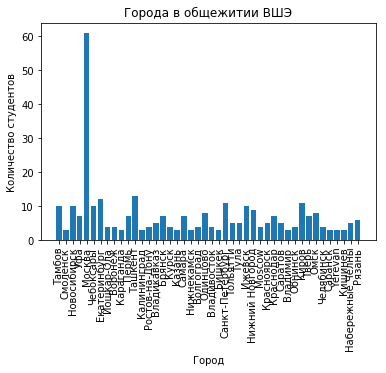

In [13]:
import matplotlib.pyplot as plt

city_nums = [cities[city] for city in cities]
city_labs = [city for city in cities]
plt.bar(range(len(city_labs)), city_nums)

plt.title('Города в общежитии ВШЭ')
plt.ylabel('Количество студентов')
plt.xlabel('Город')
plt.xticks(range(len(city_labs)), city_labs, rotation=90)
plt.legend()
plt.show()